In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

### 1. Load data

In [2]:
dpath = Path("../../py_data/HEXPractice/disHEX")
l_hex = 6.1
n_hex = 100
ks = [1, 50, 100, 150, 200]
nk = len(ks)

'''
mode:
cinlet: constant inlents
rinlet: random inlents
'''
mode = "rinlet"

# f_type: 0 - parallel flow, 1 - counter flow
f_type = 0

if f_type == 0:
    dfs = pd.read_csv(f"{dpath}/{mode}/parallel.csv", header=0)
    for k in ks:
        exec(f'df_day{k} = pd.read_csv("{dpath}/{mode}/parallel_day_{k}.csv", header=0)')
elif f_type == 1:
    dfs = pd.read_csv(f"{dpath}/{mode}/counter.csv", header=0)
    for k in ks:
        exec(f'df_day{k} = pd.read_csv("{dpath}/{mode}/counter_day_{k}.csv", header=0)')

In [3]:
dfs.head()

,Day,F1m,F1i,F1o,F1v,F1D,F1Re,F1Nu,F1h,F1Cf,...,F2D,F2Re,F2h,F2Cf,F2Tau,dP2,Sigma2,Rf2,UA,Q
0,1,0.322217,465.798592,498.889413,1.150480,0.022900,6586.499137,139.547358,731.252531,0.008780,...,0.0246,9527.987571,1774.642754,0.008006,0.475673,471.805582,0.0,0.0,233.612197,31091.664782
1,2,0.307839,468.232313,497.788455,1.103993,0.022850,6306.463636,134.780363,707.828774,0.008876,...,0.0246,10182.929107,1871.579031,0.007874,0.534360,530.015129,0.0,0.0,216.547993,26531.365741
2,3,0.335144,529.922104,531.075696,1.207069,0.022801,6880.536657,144.509286,760.548445,0.008685,...,0.0246,9587.735826,1783.539951,0.007994,0.480905,476.995311,0.0,0.0,211.239489,1127.381631
3,4,0.337971,530.924109,540.994729,1.222514,0.022752,6953.556876,145.734882,768.655101,0.008662,...,0.0246,10495.561326,1917.407982,0.007815,0.563399,558.818699,0.0,0.0,203.680257,9924.823456
4,5,0.304169,511.170485,518.493650,1.106165,0.022691,6274.912529,134.240650,709.932972,0.008887,...,0.0246,10613.307720,1934.597399,0.007793,0.574507,569.835930,0.0,0.0,181.633093,6495.323305


In [4]:
days = dfs["Day"].to_numpy()

### 2. Plots of data (overall or average) vs. days

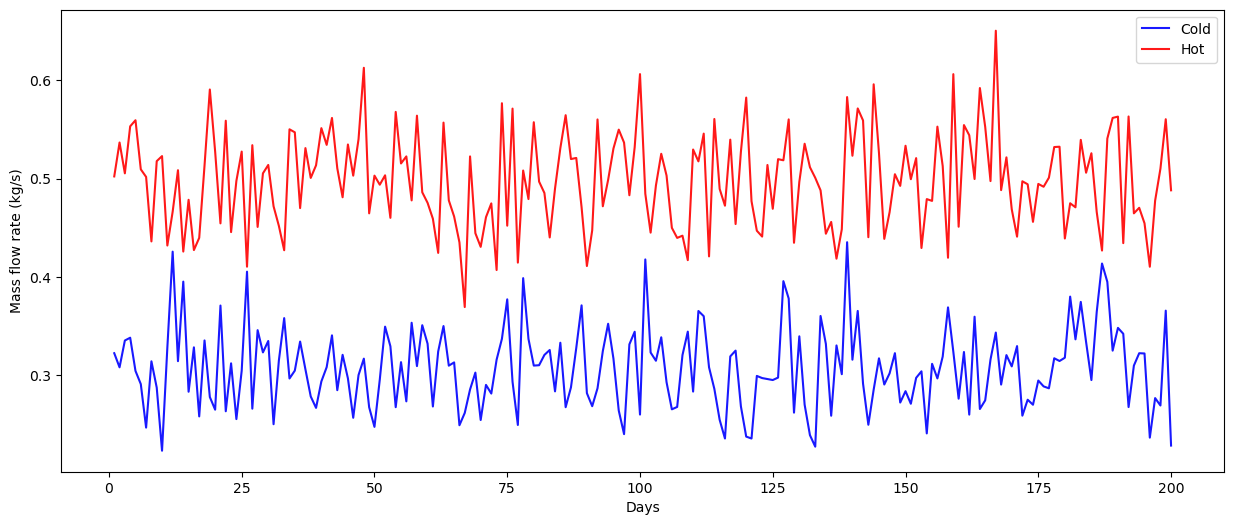

In [5]:
# mass flow vs. time
fig, ax = plt.subplots()
fig.set_figheight(6)
fig.set_figwidth(15)
ax.plot(days, dfs["F1m"].to_numpy(), c="blue", alpha=0.9, label="Cold")
ax.plot(days, dfs["F2m"].to_numpy(), c="r", alpha=0.9, label="Hot")
ax.set_ylabel("Mass flow rate (kg/s)")
ax.set_xlabel("Days")
ax.legend(loc="upper right")
plt.show()

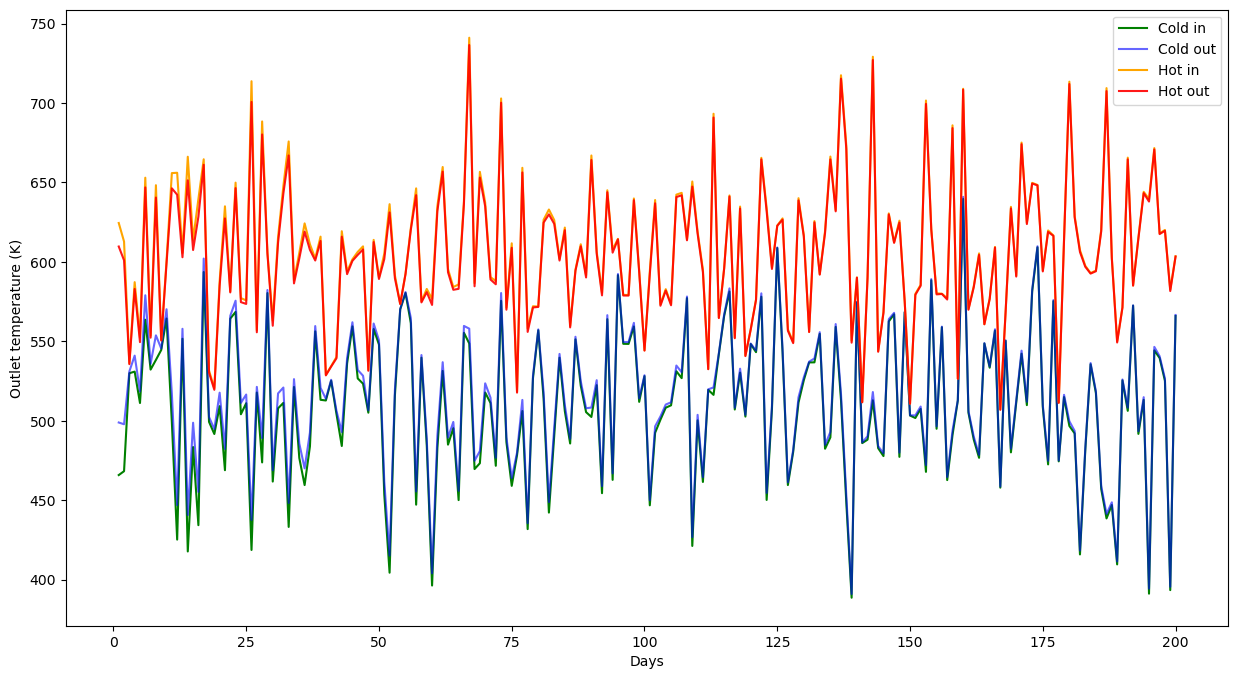

In [6]:
# outlet temperatures vs. time
fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(15)
ax.plot(days, dfs["F1i"].to_numpy(), c="green", label="Cold in")
ax.plot(days, dfs["F1o"].to_numpy(), c="blue", alpha=0.6, label="Cold out")
ax.plot(days, dfs["F2i"].to_numpy(), c="orange", label="Hot in")
ax.plot(days, dfs["F2o"].to_numpy(), c="r", alpha=0.9, label="Hot out")
ax.set_ylabel("Outlet temperature (K)")
ax.set_xlabel("Days")
ax.legend(loc="upper right")
plt.show()


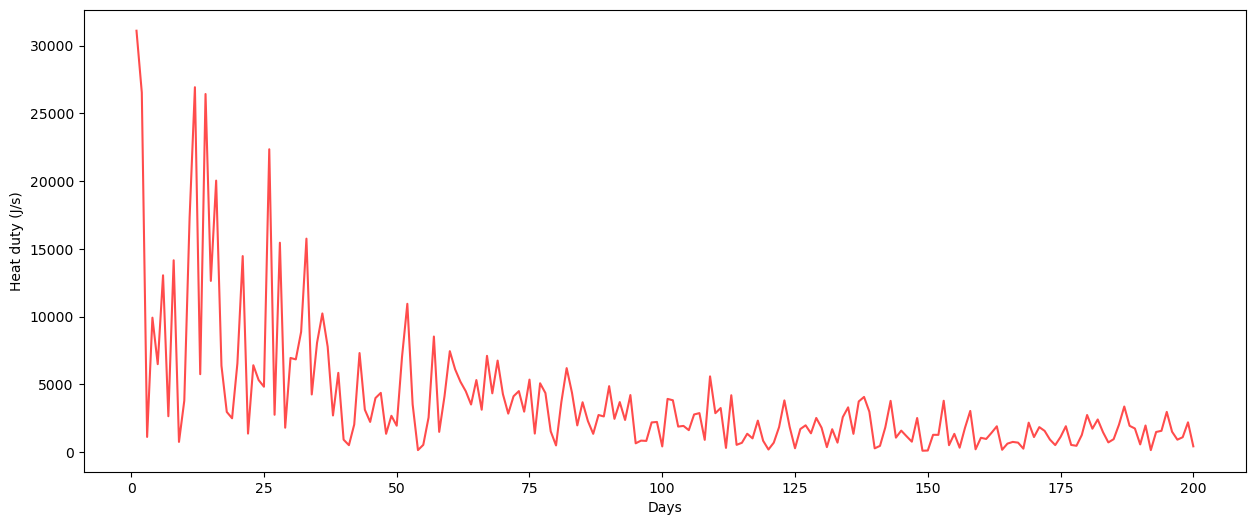

In [7]:
# Heat duty vs. time
plt.figure(figsize=(15, 6))
plt.plot(days, dfs["Q"].to_numpy(), c="r", alpha=0.7)
plt.ylabel("Heat duty (J/s)")
plt.xlabel("Days")
plt.show()

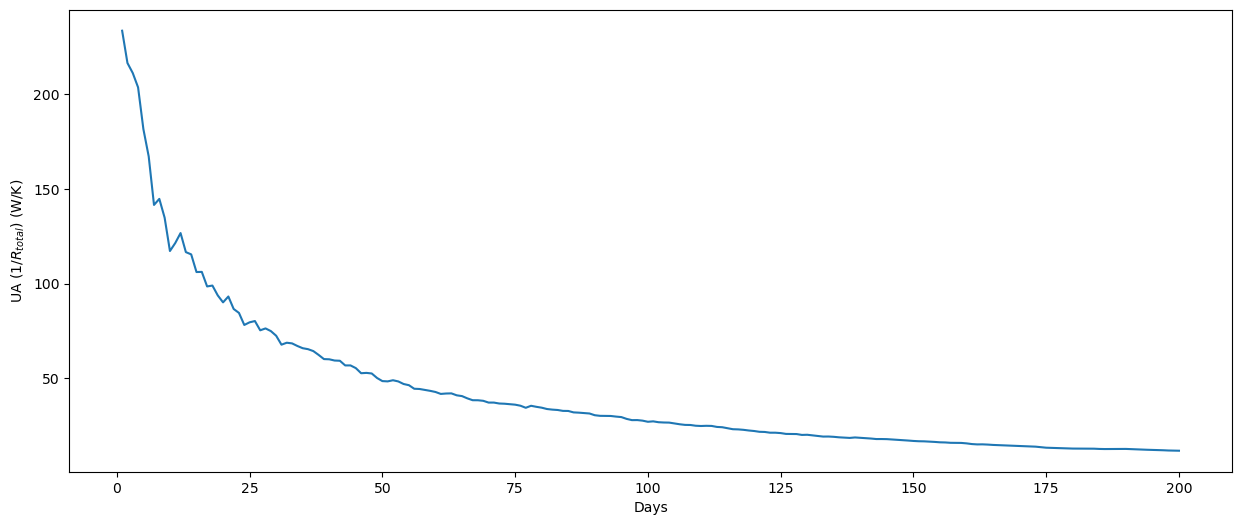

In [8]:
# UA vs. time
plt.figure(figsize=(15, 6))
plt.plot(days, dfs["UA"].to_numpy())
plt.ylabel("UA (1/$R_{total}$) (W/K)")
plt.xlabel("Days")
plt.show()

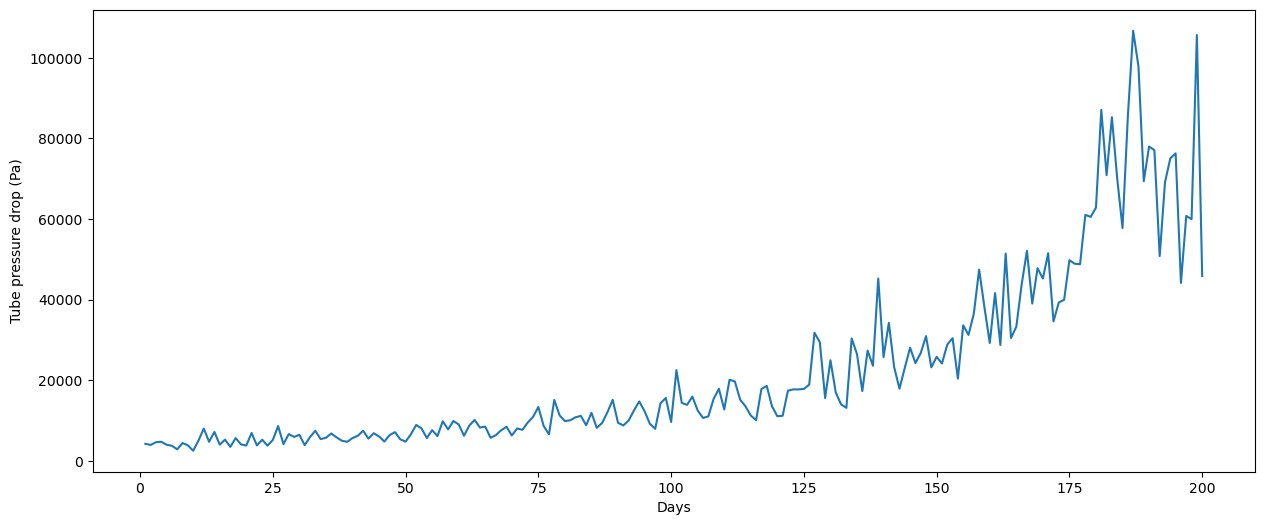

In [9]:
# dP vs. time
plt.figure(figsize=(15, 6))
plt.plot(days, dfs["dP1"].to_numpy())
plt.ylabel("Tube pressure drop (Pa)")
plt.xlabel("Days")
plt.show()

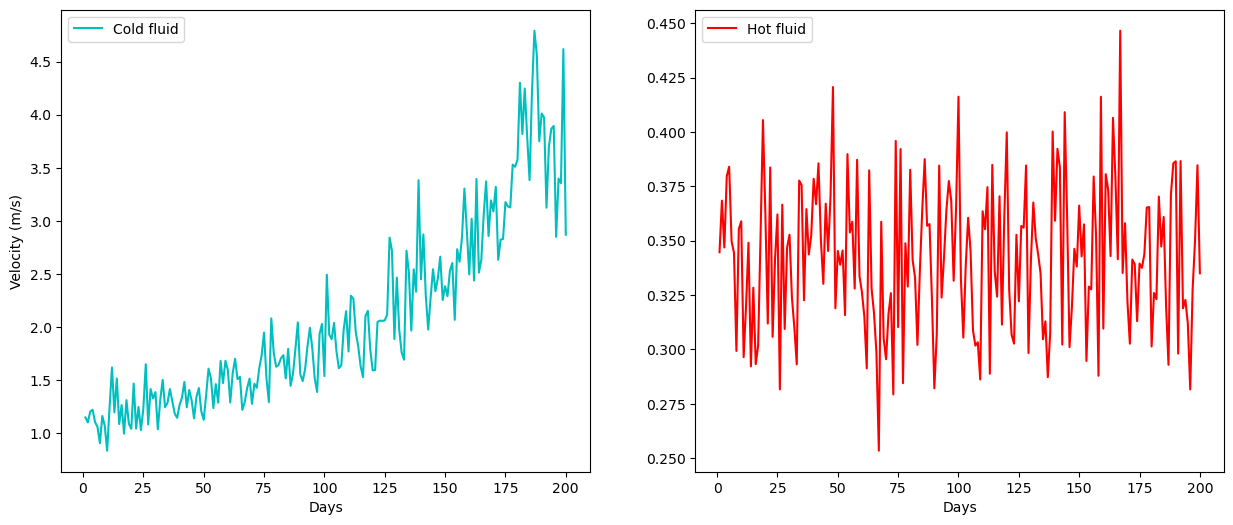

In [10]:
# Velocity vs. time
fig, ax = plt.subplots(1, 2)
fig.set_figheight(6)
fig.set_figwidth(15)
ax[0].plot(days, dfs["F1v"].to_numpy(), c="c", label="Cold fluid")
ax[1].plot(days, dfs["F2v"].to_numpy(), c="r", label="Hot fluid")
ax[0].set_ylabel("Velocity (m/s)")
ax[0].set_xlabel("Days")
ax[1].set_xlabel("Days")
ax[0].legend()
ax[1].legend()
plt.show()


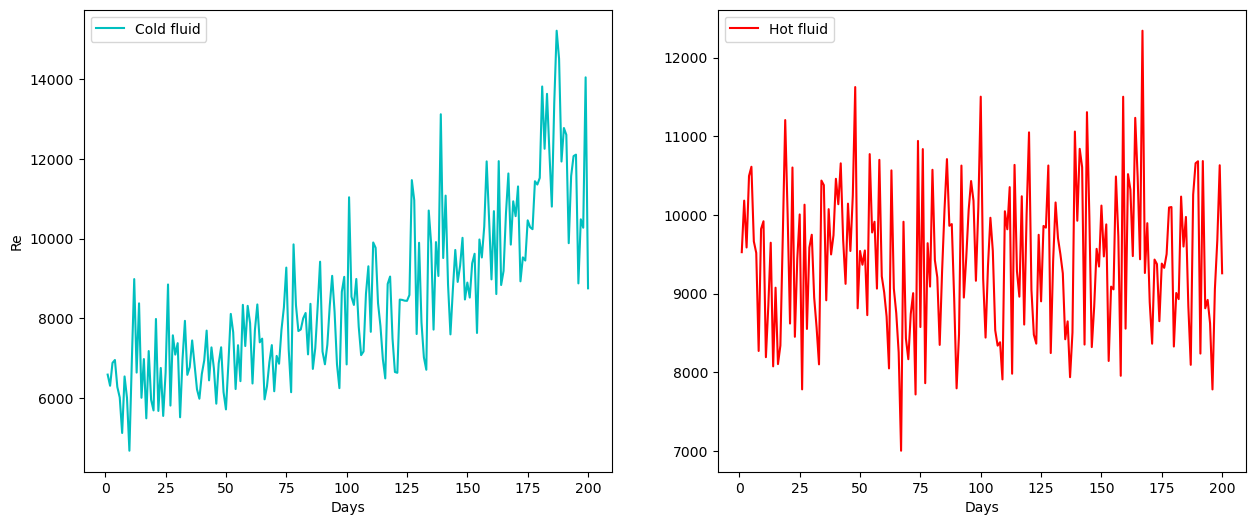

In [11]:
# Re vs. time
fig, ax = plt.subplots(1, 2)
fig.set_figheight(6)
fig.set_figwidth(15)
ax[0].plot(days, dfs["F1Re"].to_numpy(), c="c", label="Cold fluid")
ax[1].plot(days, dfs["F2Re"].to_numpy(), c="r", label="Hot fluid")
ax[0].set_ylabel("Re")
ax[0].set_xlabel("Days")
ax[1].set_xlabel("Days")
ax[0].legend()
ax[1].legend()
plt.show()


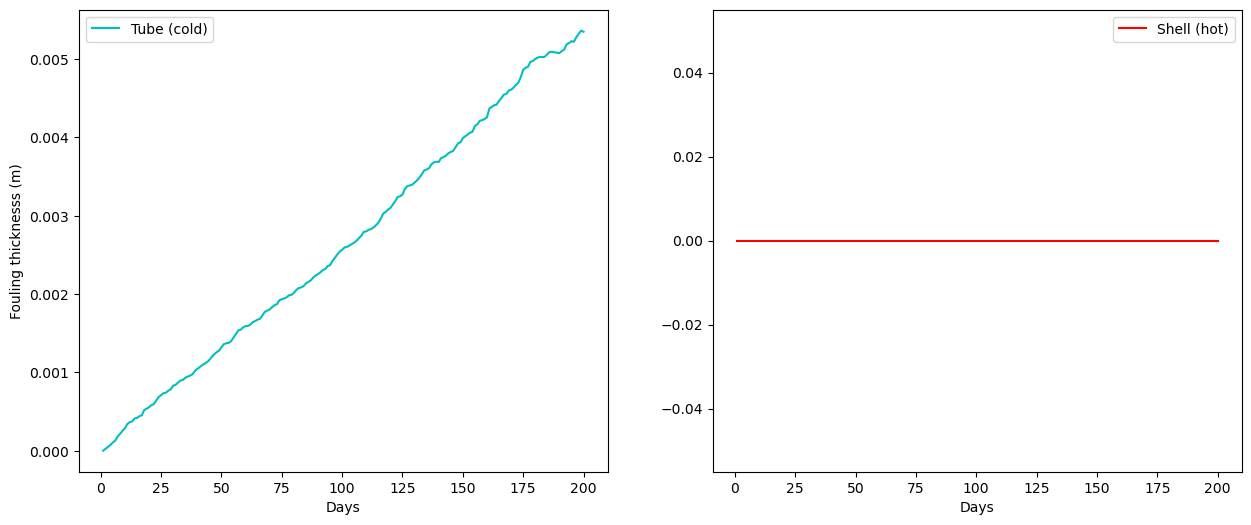

In [12]:
# Fouling thickness vs. time
fig, ax = plt.subplots(1, 2)
fig.set_figheight(6)
fig.set_figwidth(15)
ax[0].plot(days, dfs["Sigma1"].to_numpy(), c="c", label="Tube (cold)")
ax[1].plot(days, dfs["Sigma2"].to_numpy(), c="r", label="Shell (hot)")
ax[0].set_ylabel("Fouling thicknesss (m)")
ax[0].set_xlabel("Days")
ax[1].set_xlabel("Days")
ax[0].legend()
ax[1].legend()
plt.show()

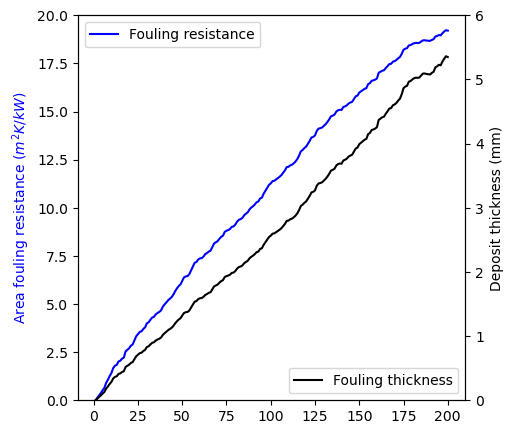

In [13]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot()
ax.plot(days, dfs["Rf1"].to_numpy() * 1000, '-b', label = 'Fouling resistance')
ax.legend(loc="upper left")
ax.set_ylim(0, 20)
ax.set_ylabel("Area fouling resistance ($m^2 K/kW$)", c="b")
ax2 = ax.twinx()
ax2.plot(days, dfs["Sigma1"].to_numpy() * 1e3, color='black', label = 'Fouling thickness')
ax2.legend(loc="lower right")
ax2.set_ylim(0, 6)
ax2.set_ylabel("Deposit thickness (mm)", c="black")


plt.show()

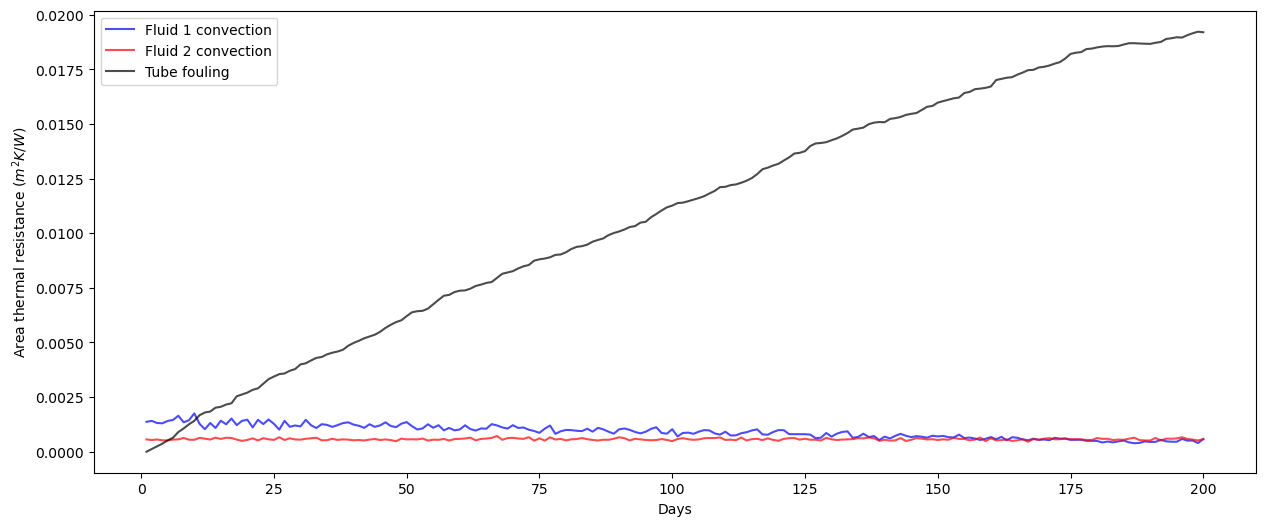

In [14]:
# Resistances vs. time
plt.figure(figsize=(15, 6))
plt.plot(days, 1 / dfs["F1h"].to_numpy(), c="b", alpha=0.7, label="Fluid 1 convection")
plt.plot(days, 1 / dfs["F2h"].to_numpy(), c="r", alpha=0.7, label="Fluid 2 convection")
plt.plot(days, dfs["Rf1"].to_numpy(), c="black", alpha=0.7, label="Tube fouling")
plt.ylabel("Area thermal resistance ($m^2 K/W$)")
plt.xlabel("Days")
plt.legend()
plt.show()

### 2. Plots of data vs. HEX distance of specific days

In [15]:
x = [i * l_hex / n_hex for i in range(n_hex)]

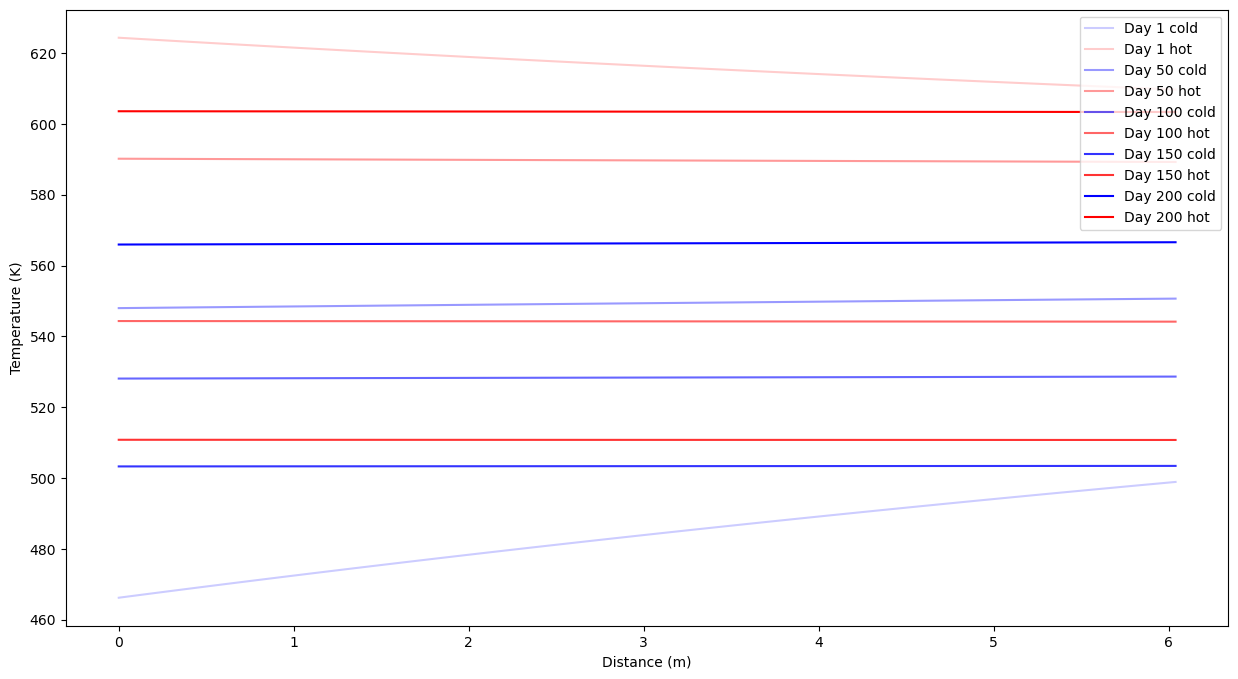

In [16]:
# temperatures vs. distance
fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(15)

for k, i in zip(ks, range(1, nk + 1)):
    exec(f'ax.plot(x, df_day{k}["F1T"].to_numpy(), c="blue", alpha={1 / nk * i}, label="Day {k} cold")')
    exec(f'ax.plot(x, df_day{k}["F2T"].to_numpy(), c="red", alpha={1 / nk * i}, label="Day {k} hot")')
ax.set_ylabel("Temperature (K)")
ax.set_xlabel("Distance (m)")
ax.legend(loc="upper right")
plt.show()

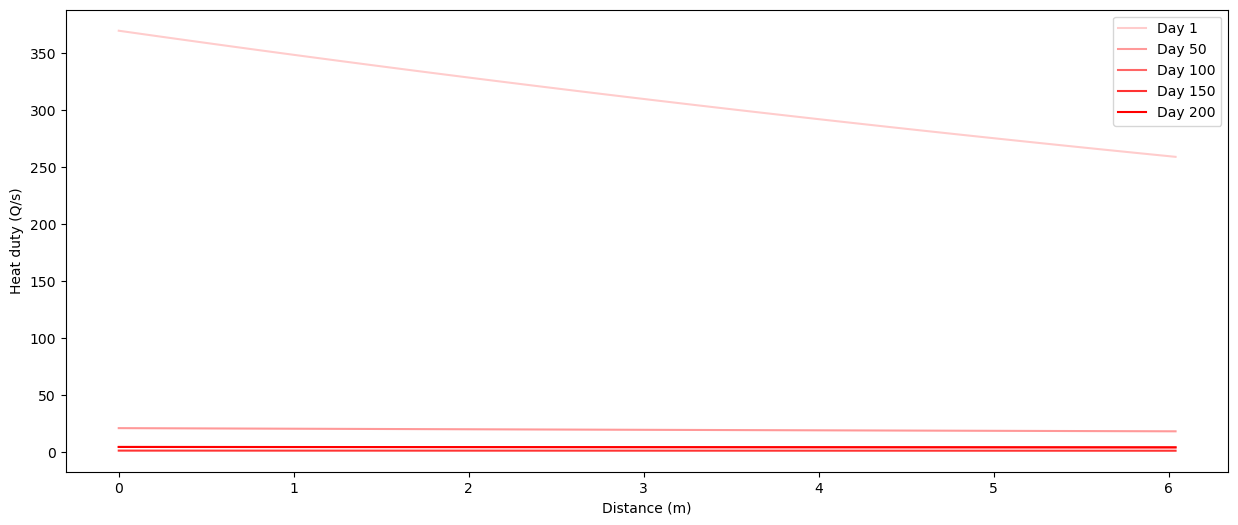

In [17]:
# heat duty vs. distance
fig, ax = plt.subplots()
fig.set_figheight(6)
fig.set_figwidth(15)

for k, i in zip(ks, range(1, nk + 1)):
    exec(f'ax.plot(x, df_day{k}["Q"].to_numpy(), c="r", alpha={1 / nk * i}, label="Day {k}")')
ax.set_ylabel("Heat duty (Q/s)")
ax.set_xlabel("Distance (m)")
ax.legend(loc="upper right")
plt.show()

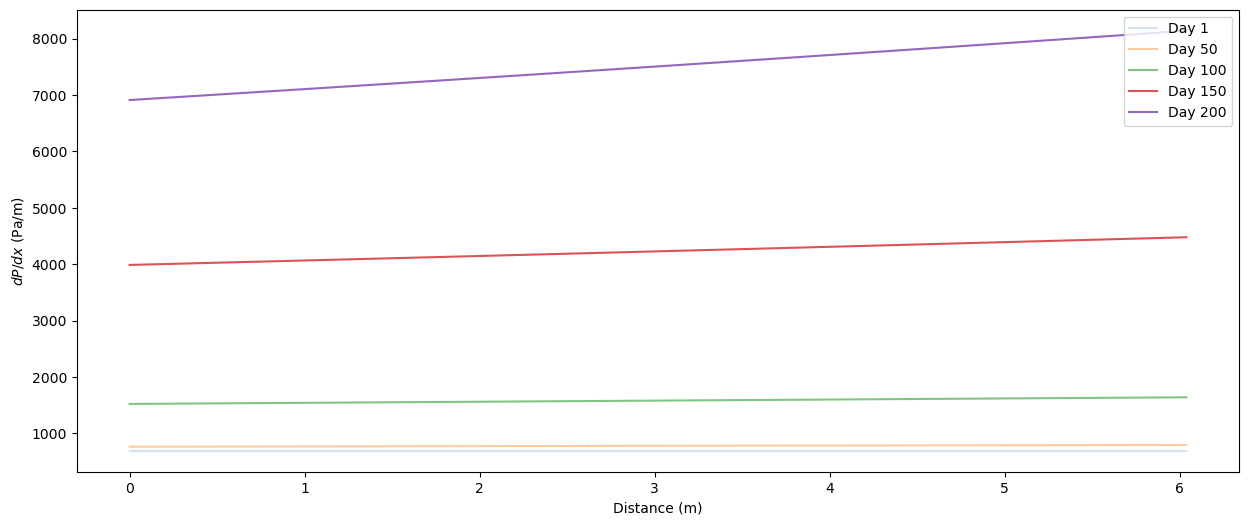

In [18]:
# pressure drop vs. distance
fig, ax = plt.subplots()
fig.set_figheight(6)
fig.set_figwidth(15)

for k, i in zip(ks, range(1, nk + 1)):
    exec(f'ax.plot(x, df_day{k}["dP1/dx"].to_numpy(), alpha={1 / nk * i}, label="Day {k}")')
ax.set_ylabel("$dP/dx$ (Pa/m)")
ax.set_xlabel("Distance (m)")
ax.legend(loc="upper right")
plt.show()

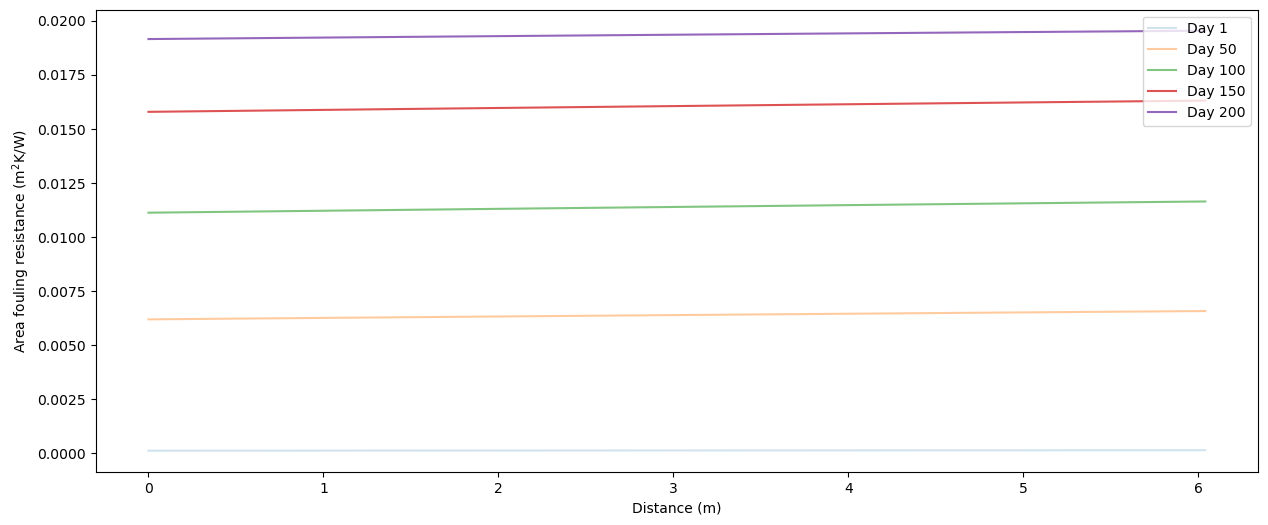

In [19]:
# fouling resistance vs. distance
fig, ax = plt.subplots()
fig.set_figheight(6)
fig.set_figwidth(15)

for k, i in zip(ks, range(1, nk + 1)):
    exec(f'ax.plot(x, df_day{k}["Rf1"].to_numpy(), alpha={1 / nk * i}, label="Day {k}")')
ax.set_ylabel("Area fouling resistance (m$^2$K/W)")
ax.set_xlabel("Distance (m)")
ax.legend(loc="upper right")
plt.show()

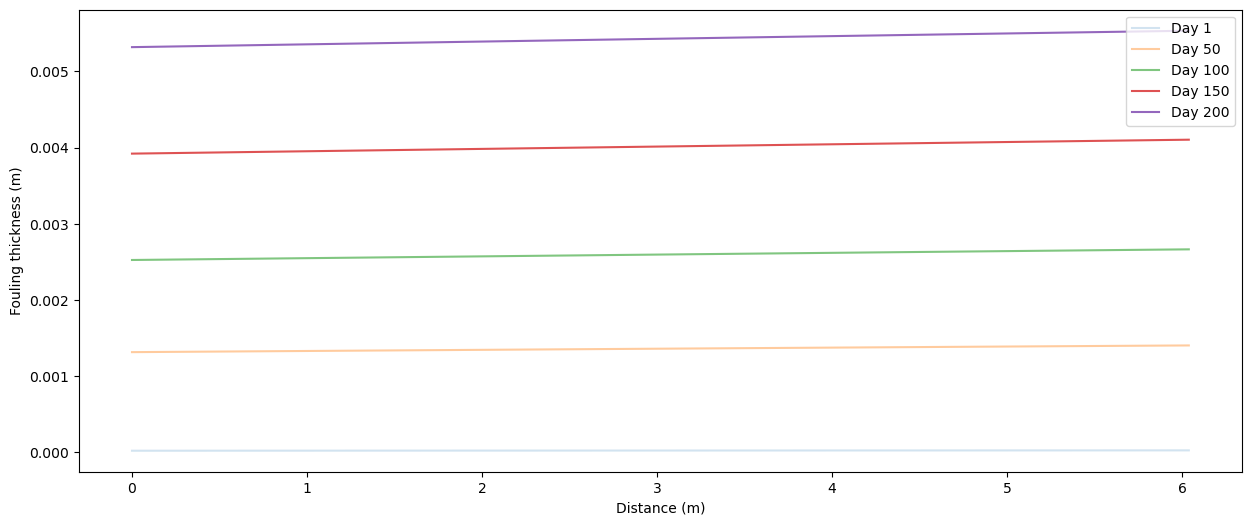

In [20]:
# fouling thickness vs. distance
fig, ax = plt.subplots()
fig.set_figheight(6)
fig.set_figwidth(15)

for k, i in zip(ks, range(1, nk + 1)):
    exec(f'ax.plot(x, df_day{k}["Sigma1"].to_numpy(), alpha={1 / nk * i}, label="Day {k}")')
ax.set_ylabel("Fouling thickness (m)")
ax.set_xlabel("Distance (m)")
ax.legend(loc="upper right")
plt.show()

### 3. Compare lumped result with distributed one

In [21]:
spath1 = Path(f"{dpath}/../lumpHEX/{mode}")
if f_type == 0:
    df1 = pd.read_csv(f"{spath1}/parallel.csv", header=0)
elif f_type == 1:
    df1 = pd.read_csv(f"{spath1}/counter.csv", header=0)

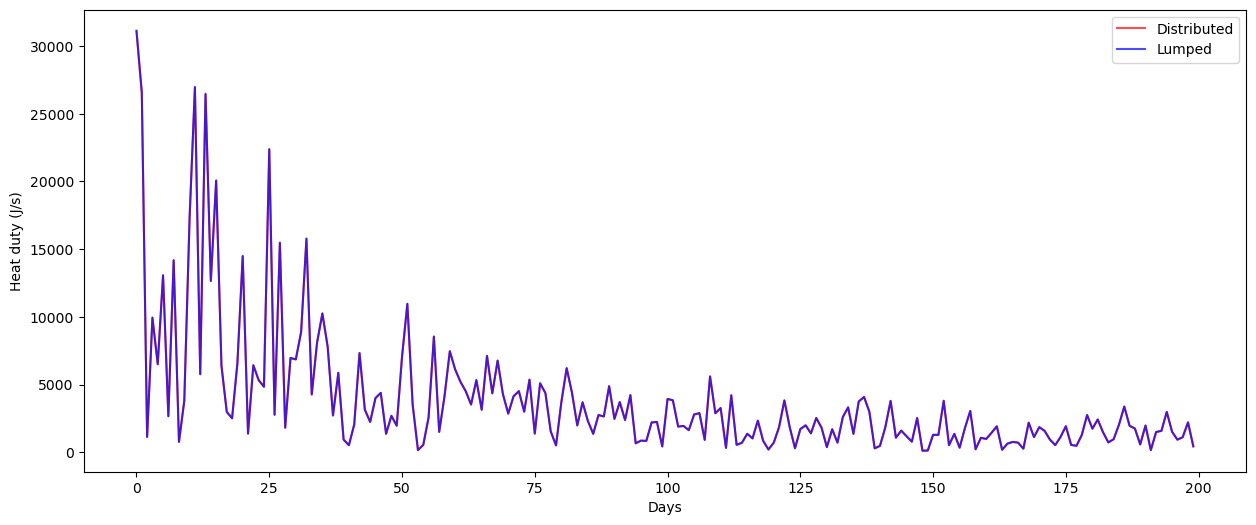

In [22]:
# Heat duty vs. time
plt.figure(figsize=(15, 6))
plt.plot(dfs["Q"].to_numpy(), c="r", alpha=0.7, label="Distributed")
plt.plot(df1["Q"].to_numpy(), c="b", alpha=0.7, label="Lumped")
plt.ylabel("Heat duty (J/s)")
plt.xlabel("Days")
plt.legend()
plt.show()

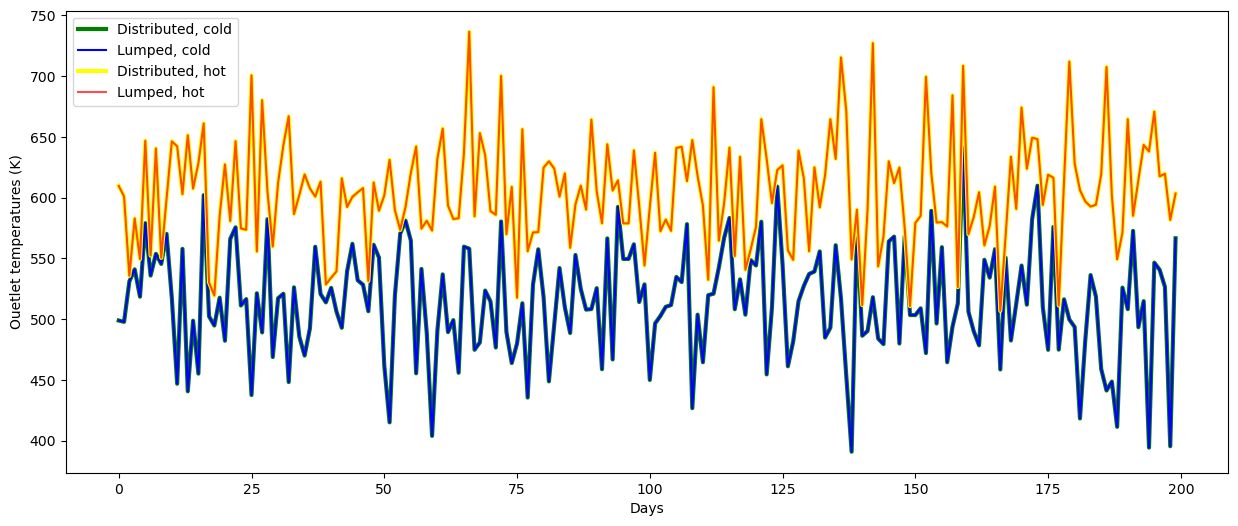

In [23]:
# Outlet temperature vs. time
plt.figure(figsize=(15, 6))
plt.plot(dfs["F1o"].to_numpy(), c="green", alpha=1, linewidth=3, label="Distributed, cold")
plt.plot(df1["F1o"].to_numpy(), c="blue", alpha=1, label="Lumped, cold")

plt.plot(dfs["F2o"].to_numpy(), c="yellow", alpha=1, linewidth=3, label="Distributed, hot")
plt.plot(df1["F2o"].to_numpy(), c="red", alpha=0.7, label="Lumped, hot")
plt.ylabel("Ouetlet temperatures (K)")
plt.xlabel("Days")
plt.legend()
plt.show()

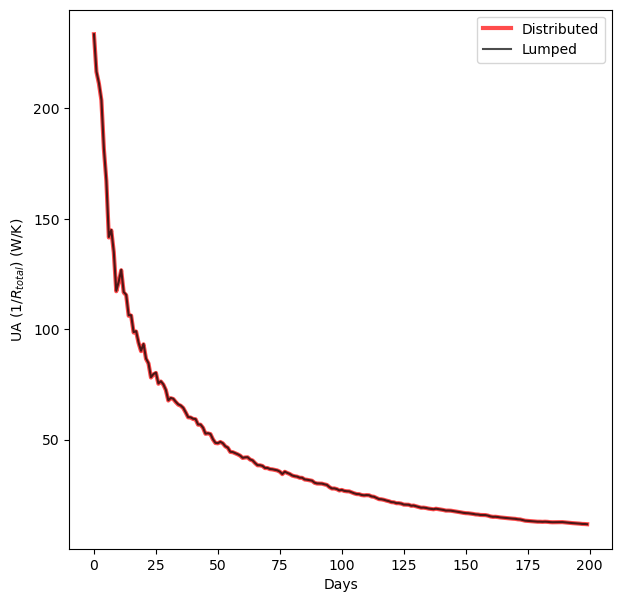

In [24]:
# UA vs. time, lumped should be about 100 times
plt.figure(figsize=(7, 7))
plt.plot(dfs["UA"], c="red", alpha=0.7, linewidth=3, label="Distributed")
plt.plot(df1["UA"], c="black", alpha=0.7, label="Lumped")
plt.ylabel("UA (1/$R_{total}$) (W/K)")
plt.xlabel("Days")
plt.legend()
plt.show()

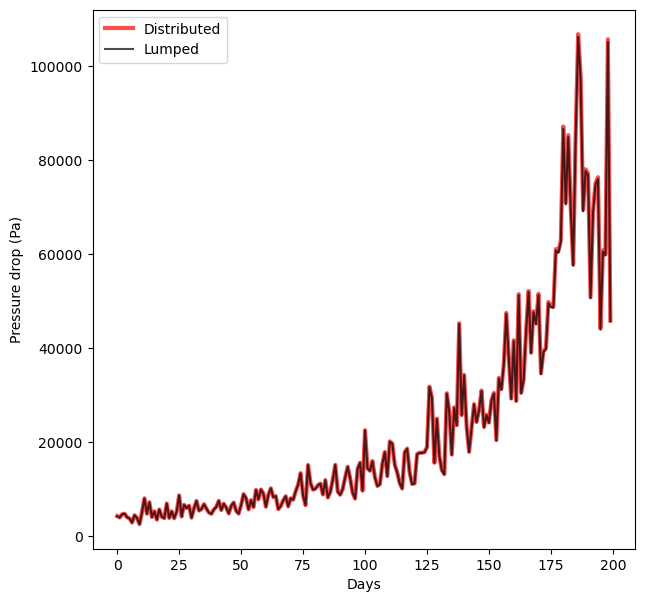

In [25]:
# dP vs. time
plt.figure(figsize=(7, 7))
plt.plot(dfs["dP1"], c="r", alpha=0.7, linewidth=3, label="Distributed")
plt.plot(df1["dP1"], c="black", alpha=0.7, label="Lumped")
plt.ylabel("Pressure drop (Pa)")
plt.xlabel("Days")
plt.legend()
plt.show()

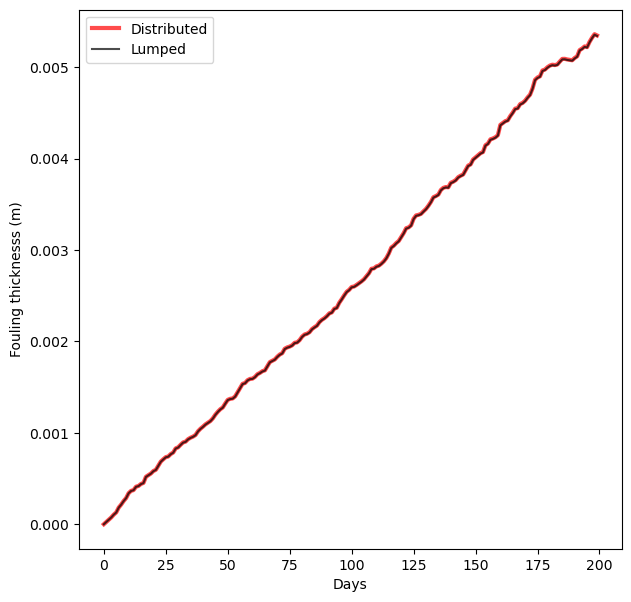

In [26]:
# Fouling thickness vs. time
plt.figure(figsize=(7, 7))
plt.plot(dfs["Sigma1"], c="r", alpha=0.7, linewidth=3, label="Distributed")
plt.plot(df1["Sigma1"], c="black", alpha=0.7, label="Lumped")
plt.ylabel("Fouling thicknesss (m)")
plt.xlabel("Days")
plt.legend()
plt.show()

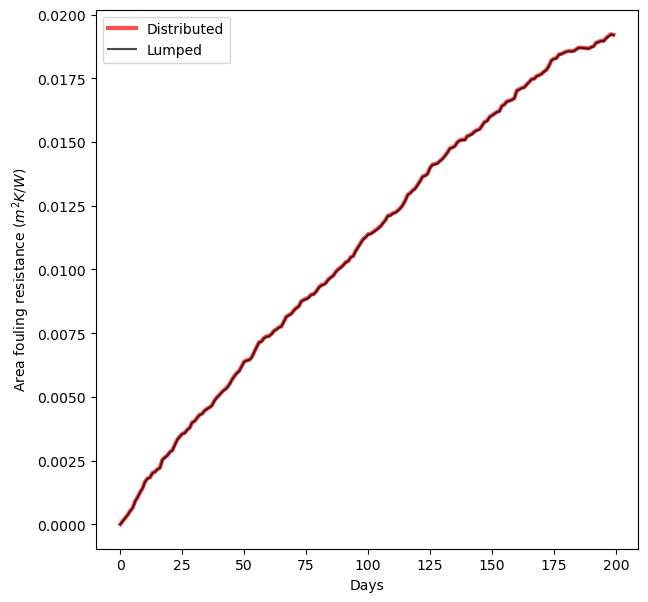

In [27]:
# Fouling resistance vs. time
plt.figure(figsize=(7, 7))
plt.plot(dfs["Rf1"], c="r", alpha=0.7, linewidth=3, label="Distributed")
plt.plot(df1["Rf1"], c="black", alpha=0.7, label="Lumped")
plt.ylabel("Area fouling resistance ($m^2 K / W$)")
plt.xlabel("Days")
plt.legend()
plt.show()